# Kratos example

In [1]:
from probabilistic_library import ReliabilityProject, ReliabilityMethod, DistributionType, CombineProject, CombineType, CombinerMethod, CompareType
from probabilistic_library import UncertaintyProject, UncertaintyMethod, Stochast

### Model

In [2]:
from run_kratos_quay_wall import zfuncwrapper_mohr_coulomb

### Variables

In [3]:
def define_project_variables(project, sheetpile_thickness):

    project.variables["geo_cohesion"].distribution = DistributionType.log_normal
    project.variables["geo_cohesion"].is_array = True
    project.variables["geo_cohesion"].array_size = 7
    project.variables["geo_cohesion"].mean = 3.0
    project.variables["geo_cohesion"].variation = 0.2

    project.variables["geo_friction_angle"].is_array = True
    project.variables["geo_friction_angle"].array_size = 7
    for i in range(project.variables["geo_friction_angle"].array_size):
        friction_angle = Stochast()
        friction_angle.distribution = DistributionType.log_normal
        if i in [0, 1, 2, 3]: # klei
            friction_angle.mean = 22.5
        elif i in [5, 6, 7]: # zand
            friction_angle.mean = 32.5
        friction_angle.variation = 0.08
        project.variables["geo_friction_angle"].array_variables.append(friction_angle)

    project.variables["geo_tensile_strength"].distribution = DistributionType.deterministic
    project.variables["geo_tensile_strength"].is_array = True
    project.variables["geo_tensile_strength"].array_size = 7
    project.variables["geo_tensile_strength"].mean = 0.0 # value checked

    project.variables["sheetpile_young_modulus"].distribution = DistributionType.deterministic
    project.variables["sheetpile_young_modulus"].is_array = True
    project.variables["sheetpile_young_modulus"].array_size = 1
    project.variables["sheetpile_young_modulus"].mean = 200e9 # value checked

    project.variables["sheetpile_poisson_ratio"].distribution = DistributionType.deterministic
    project.variables["sheetpile_poisson_ratio"].is_array = True
    project.variables["sheetpile_poisson_ratio"].array_size = 1
    project.variables["sheetpile_poisson_ratio"].mean = 0.0 # value checked

    project.variables["sheetpile_thickness"].distribution = DistributionType.deterministic
    project.variables["sheetpile_thickness"].is_array = True
    project.variables["sheetpile_thickness"].array_size = 1
    project.variables["sheetpile_thickness"].mean = sheetpile_thickness

    return project

### Uncertainty analysis

Skipping input parameter for stage 0
Skipping input parameter for stage 0
Skipping input parameter for stage 0
Skipping input parameter for stage 0
Skipping input parameter for stage 0
Skipping input parameter for stage 0
Skipping input parameter for stage 0
Skipping input parameter for stage 0
Skipping input parameter for stage 0
Skipping input parameter for stage 0
Skipping input parameter for stage 0
Skipping input parameter for stage 0
Skipping input parameter for stage 0
Skipping input parameter for stage 0
Skipping input parameter for stage 0
Skipping input parameter for stage 0
Skipping input parameter for stage 0
Skipping input parameter for stage 0
Skipping input parameter for stage 0
Skipping input parameter for stage 0
Skipping input parameter for stage 0
Skipping input parameter for stage 0
Skipping input parameter for stage 0
Skipping input parameter for stage 0
Skipping input parameter for stage 0
Skipping input parameter for stage 0
Skipping input parameter for stage 0
S

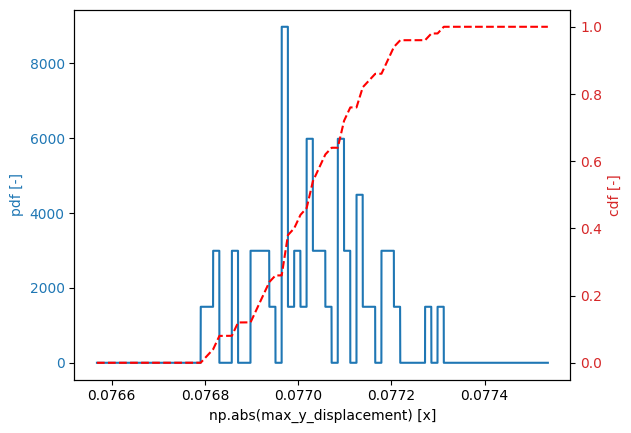

In [4]:
project = UncertaintyProject()
wrapper = zfuncwrapper_mohr_coulomb(output_stage_number = 3, clean_up = True)
project.model = wrapper.total_displacement

sheetpile_thickness = 0.015
project = define_project_variables(project, sheetpile_thickness)

project.settings.uncertainty_method = UncertaintyMethod.crude_monte_carlo
project.settings.variation_coefficient = 0.02
project.settings.minimum_samples = 10
project.settings.maximum_samples = 50
project.settings.save_convergence = True
project.settings.save_realizations = True

project.run()

project.stochast.plot()

### Reliability analysis, prior

Sheetpile thickness = 0.015 in year 50

Skipping input parameter for stage 0
Skipping input parameter for stage 0
Skipping input parameter for stage 0
Skipping input parameter for stage 0
Skipping input parameter for stage 0
Skipping input parameter for stage 0
Skipping input parameter for stage 0
Skipping input parameter for stage 0
Skipping input parameter for stage 0
Skipping input parameter for stage 0
Skipping input parameter for stage 0
Skipping input parameter for stage 0
Skipping input parameter for stage 0
Skipping input parameter for stage 0
Skipping input parameter for stage 0
Skipping input parameter for stage 0
Skipping input parameter for stage 0
Skipping input parameter for stage 0
Skipping input parameter for stage 0
Skipping input parameter for stage 0
Skipping input parameter for stage 0
Skipping input parameter for stage 0
Skipping input parameter for stage 0
Skipping input parameter for stage 0
Skipping input parameter for stage 0
Skipping input parameter for stage 0
Skipping input parameter for stage 0
S

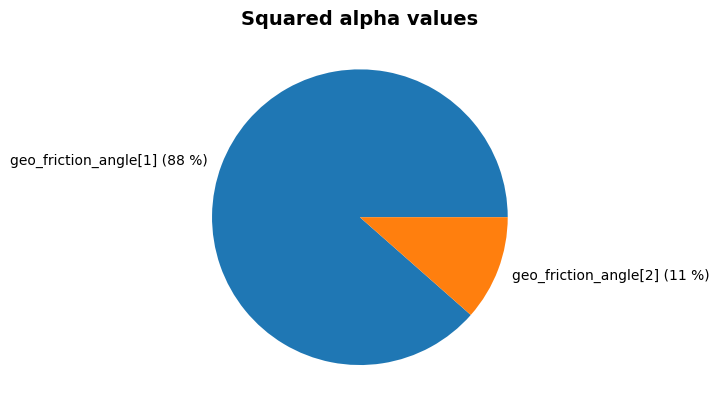

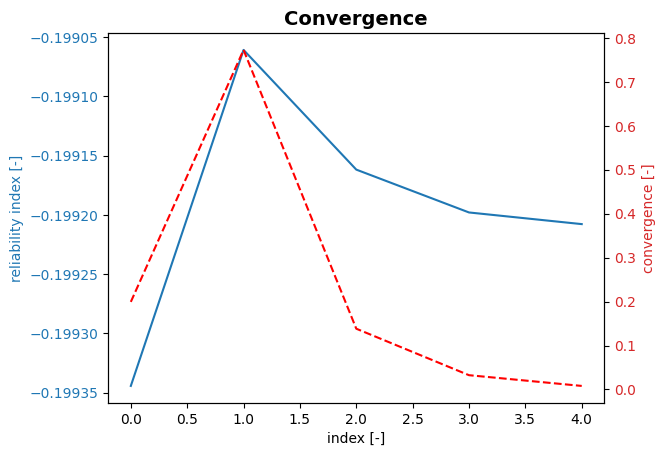

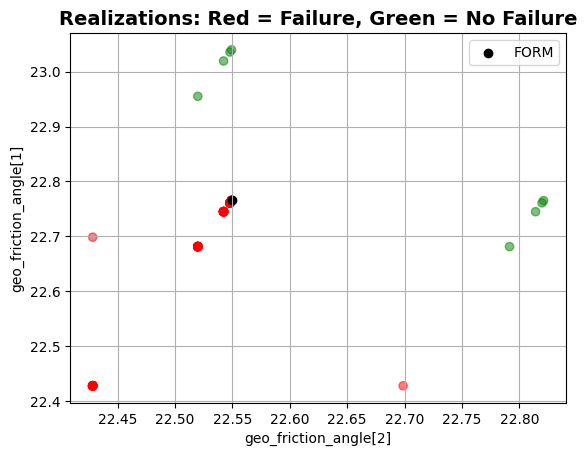

In [6]:
project = ReliabilityProject()
wrapper = zfuncwrapper_mohr_coulomb(output_stage_number = 3, clean_up = True)
project.model = wrapper.total_displacement

sheetpile_thickness = 0.015
project = define_project_variables(project, sheetpile_thickness)

project.limit_state_function.parameter = project.model.output_parameters[0]
project.limit_state_function.compare_type = CompareType.greater_than
project.limit_state_function.critical_value = 0.077

project.settings.reliability_method = ReliabilityMethod.form
project.settings.epsilon_beta = 0.02
project.settings.maximum_iterations = 50
project.settings.save_convergence = True
project.settings.save_realizations = True

project.run()

project.design_point.print()
project.design_point.plot_alphas()
project.design_point.plot_convergence()
project.design_point.plot_realizations()

prior = project.design_point

### Survived event

Thickess = 0.025 in year 0

Skipping input parameter for stage 0
Skipping input parameter for stage 0
Skipping input parameter for stage 0
Skipping input parameter for stage 0
Skipping input parameter for stage 0
Skipping input parameter for stage 0
Skipping input parameter for stage 0
Skipping input parameter for stage 0
Skipping input parameter for stage 0
Skipping input parameter for stage 0
Skipping input parameter for stage 0
Skipping input parameter for stage 0
Skipping input parameter for stage 0
Skipping input parameter for stage 0
Skipping input parameter for stage 0
Skipping input parameter for stage 0
Skipping input parameter for stage 0
Skipping input parameter for stage 0
Skipping input parameter for stage 0
Skipping input parameter for stage 0
Skipping input parameter for stage 0
Skipping input parameter for stage 0
Skipping input parameter for stage 0
Skipping input parameter for stage 0
Skipping input parameter for stage 0
Skipping input parameter for stage 0
Skipping input parameter for stage 0
S

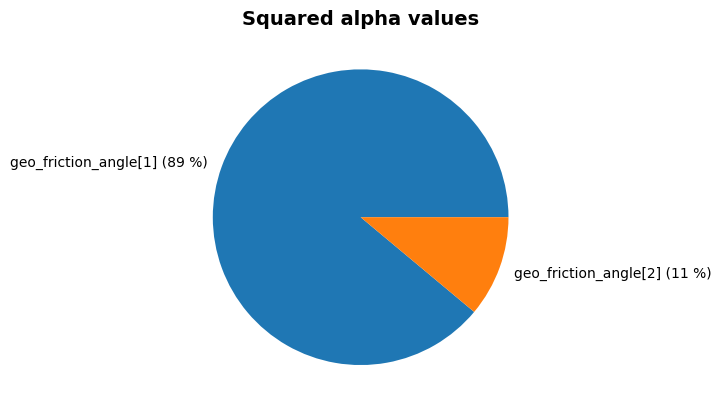

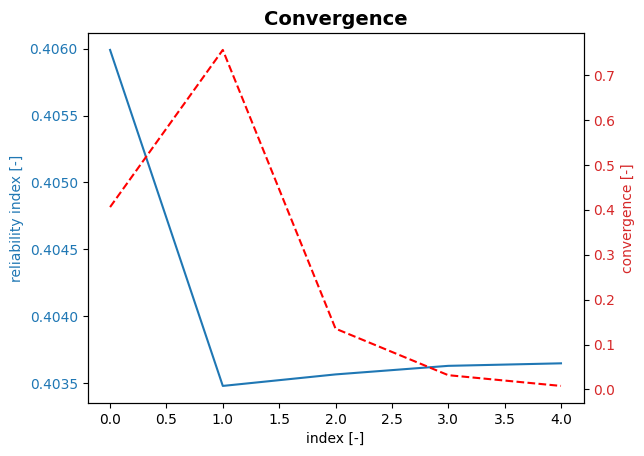

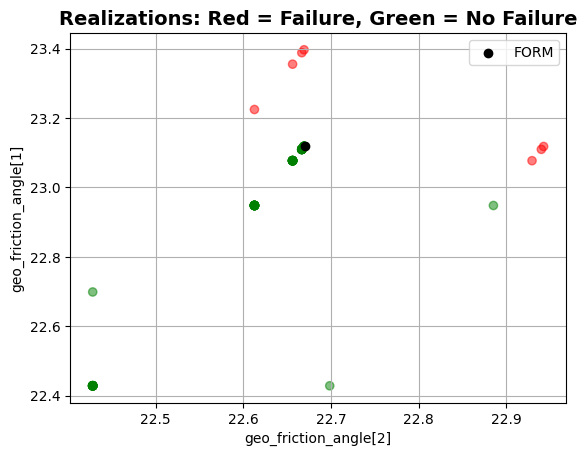

In [7]:
sheetpile_thickness = 0.025
project = define_project_variables(project, sheetpile_thickness)

project.limit_state_function.parameter = project.model.output_parameters[0]
project.limit_state_function.compare_type = CompareType.less_than
project.limit_state_function.critical_value = 0.077

project.settings.reliability_method = ReliabilityMethod.form
project.settings.epsilon_beta = 0.02
project.settings.maximum_iterations = 50
project.settings.save_convergence = True
project.settings.save_realizations = True

project.run()

project.design_point.print()
project.design_point.plot_alphas()
project.design_point.plot_convergence()
project.design_point.plot_realizations()

survived_event = project.design_point

### Combined probability

In [9]:
combine_project = CombineProject()

combine_project.design_points.append(prior)
combine_project.design_points.append(survived_event)

combine_project.settings.combine_type = CombineType.parallel
combine_project.settings.combiner_method = CombinerMethod.hohenbichler_form

combine_project.run()

combine_project.design_point.print()

comb = combine_project.design_point

Reliability:
 Reliability index = 30.19
 Probability of failure = 1.782e-200
 Model runs = 0
Alpha values:
 geo_cohesion[0]: alpha = 0, x = 2.942
 geo_cohesion[0]: alpha = 0.001601, x = 2.914
 geo_cohesion[0]: alpha = 0.0001649, x = 2.939
 geo_cohesion[0]: alpha = 0, x = 2.942
 geo_cohesion[0]: alpha = 2.388e-05, x = 2.941
 geo_cohesion[0]: alpha = 0, x = 2.942
 geo_cohesion[0]: alpha = 0, x = 2.942
 geo_friction_angle[0]: alpha = 0, x = 22.43
 geo_friction_angle[1]: alpha = -0.3468, x = 51.75
 geo_friction_angle[2]: alpha = 0.9378, x = 2.338
 geo_friction_angle[3]: alpha = 0, x = 22.43
 geo_friction_angle[4]: alpha = 0.01607, x = 0.9589
 geo_friction_angle[5]: alpha = 0, x = 32.4
 geo_friction_angle[6]: alpha = 0, x = 32.4
 geo_tensile_strength[0]: alpha = 0, x = 0
 geo_tensile_strength[0]: alpha = 0, x = 0
 geo_tensile_strength[0]: alpha = 0, x = 0
 geo_tensile_strength[0]: alpha = 0, x = 0
 geo_tensile_strength[0]: alpha = 0, x = 0
 geo_tensile_strength[0]: alpha = 0, x = 0
 geo_ten

### Reliability, posterior

In [10]:
prob_posterior = comb.probability_failure/survived_event.probability_failure

print(prob_posterior)

5.1928354788380477e-200
